In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import csv
import sys
sys.path.append('/Users/arleeshelby/ManitobaWork_1374/pyNab/src')
import nabPy as Nab

In [30]:
runNumber = 1374
directory = '/Users/arleeshelby/ManitobaData_1374/'
run = Nab.DataRun(directory, runNumber, ignoreEventFile = True)

In [33]:
# run.singleWaves().resetCuts()
# run.singleWaves().defineCut('pixel', '=', 76)
# results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

In [7985]:
run.singleWaves().resetCuts()
run.singleWaves().defineCut('pixel', '=', 124)
results = run.singleWaves().determineEnergyTiming(method='trap', params=[1250, 50, 1250])

In [7986]:
def gaussian(x,*pars):
    return pars[0]*np.exp(-1.0 * ((x-pars[1])/pars[2])**2.0)
def double_gaus(x,*pars):
    return pars[0]*np.exp(-1.0 * ((x-pars[1])/np.abs(pars[2]))**2.0) + (pars[0]*1.137/5.60)*np.exp(-1.0 * ((x-(pars[1]*390.872/387.461))/np.abs(pars[2]))**2.0) 

def line1(x,*pars):
    return pars[0]*x + pars[1]
def line2(x,*pars):
    return -pars[0]*x + pars[1]
def gaus(x,*pars):
    offset = pars[-1]
    
    y = np.zeros(x.shape)
    
    gaus_loc = np.logical_and(x>pars[1]-pars[2],x<(pars[4]*390.872/387.461)+pars[5])
    y[x<pars[1]-pars[2]] = line1(x[x<pars[1]-pars[2]],*pars[6:8])
    y[x>(pars[4]*390.872/387.461)+pars[5]] = line2(x[x>(pars[4]*390.872/387.461)+pars[5]],*pars[7:9])
    y[gaus_loc] = (line2(x[gaus_loc],*pars[7:9])-line1(x[gaus_loc],*pars[6:8]))/len(gaus_loc)
    # y[gaus_loc] = line3(x[gaus_loc],*pars)
    
    
#     gaus_loc_1 = np.logical_and(x<pars[1]+pars[2],x>pars[1]-pars[2])
#     gaus_loc_2 = np.logical_and(x<pars[4]-pars[5],x>pars[1]+pars[2])
#     gaus_loc_3 = np.logical_and(x<(pars[4]*390.872/387.461)+pars[5],x>pars[4]-pars[5])
    
#     y[x<pars[1]-pars[2]] = line1(x[x<pars[1]-pars[2]],*pars)

#     y[gaus_loc_2] = line2(x[gaus_loc_2],*pars)/len(gaus_loc_2)
#     y[x>(pars[4]*390.872/387.461)+pars[5]] = line3(x[x>(pars[4]*390.872/387.461)+pars[5]],*pars)
#     y[gaus_loc_1] = (line2(x[gaus_loc_1],*pars)-line1(x[gaus_loc_1],*pars))/len(gaus_loc_1)
    
#     y[gaus_loc_3] = (line3(x[gaus_loc_3],*pars)-line2(x[gaus_loc_3],*pars))/len(gaus_loc_3)
    
    # y[gaus_loc] = ((line2(x[x>pars[1]+pars[2]],*pars)[0]-line1(x[x<pars[1]-pars[2]],*pars)[-1])/(2*pars[2]))*(x[gaus_loc]-pars[1])
    # y[x>=pars[1]-pars[2]] = (line1(x,*pars)-line2(x,*pars))/(2*pars[2])
   
    # y[x>pars[4]+pars[2]] = line2(x,*pars)
    
    # gaus = gaussian(x,*pars[0:3]) + offset
    # y[x>=pars[4]-pars[2]] = (line2(x[x>=pars[4]-pars[2]],*pars)-line3(x[x>=pars[4]-pars[2]],*pars))/(2*pars[2])
    # y[x>pars[4]+pars[2]] = line3(x[x>pars[4]+pars[2]],*pars)
    
    gaus = double_gaus(x,*pars[3:6])+ gaussian(x,*pars[0:3]) + offset
    
    
    return gaus +y

In [7987]:
# min = 2
histogram, bin_edges = Nab.np.histogram(results.data()['energy'], bins = Nab.np.arange(611, 700))
peak = max(histogram)
cent = list(histogram).index(max(histogram))+610
histogram, bin_edges = Nab.np.histogram(results.data()['energy'], bins = Nab.np.arange(300, 1400))
# 800 for the upper limit with both peaks 
#622 for only one peak
width = bin_edges[1]-bin_edges[0]

In [7988]:
parameters, errors = curve_fit(gaus, bin_edges[:-1]+width/2, histogram,p0 = [60,598,3,peak,cent,3,2,1e-8,1,1])

In [7989]:
chi2 = sum((histogram-gaus(bin_edges[:-1]+width/2,*parameters))**2)/(len(bin_edges[:-1]+width/2)-len(parameters))

In [7990]:
cent

637

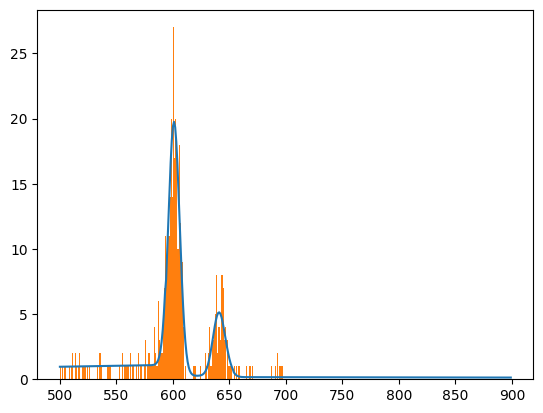

In [7991]:
x = np.arange(500, 900)
plt.plot(x,gaus(x,*parameters))

plt.hist(results.data()['energy'],bins=Nab.np.arange(500, 700))

# y = parameters[3]*(x[x<parameters[1]-parameters[2]]-parameters[1])+parameters[4]
# y2 = parameters[5]*(x[x>parameters[1]+parameters[2]]-parameters[1])+parameters[6]
# y3 = parameters[0]*np.exp(-1* ((x-parameters[1])/parameters[2])**2) + parameters[-1]
# plt.plot(x[x<parameters[1]-parameters[2]],y)
# plt.plot(x[x>parameters[1]+parameters[2]],y2)
# plt.plot(x,y3)
# plt.ylim(0,10)
# plt.yscale('log')
plt.show()

In [7992]:
(parameters[4]*390.872/387.461)

645.8278690108621

In [7993]:
parameters[1],parameters[4]

(600.9719799173747, 640.1919604239179)

In [7994]:
(parameters[3]*1.137/5.60)

0.8864526787452277

In [7995]:
parameters[3]

4.365993844303672

In [7996]:
def poly(x,*pars):
    return (pars[0] + pars[1]*x +pars[2]*x**2)
def gaussian(x,*pars):
    return pars[0]*np.exp(-1.0 * ((x-pars[1])/pars[2])**2.0)

def threshold(x,*pars):
    return pars[0]*np.exp(-1.0 * ((x)/pars[2])**2.0)

def double_gaus(x,*pars):
    return pars[0]*np.exp(-1.0 * ((x-pars[1])/np.abs(pars[2]))**2.0) + (pars[0]*16.05/79.8)*np.exp(-1.0 * ((x-(pars[1]*27.3523/22.59))/np.abs(pars[2]))**2.0) 

def multi_gaus(x, *pars):
    num_gaus = int((len(pars))/3)
    # print(pars)
    if num_gaus==2:
        g = threshold(x,*pars[0:3]) + double_gaus(x,*pars[3:6])
    if num_gaus==3:
        g = threshold(x,*pars[0:3]) + double_gaus(x,*pars[3:6]) + gaussian(x,*pars[6:9])
    if num_gaus==4:
        g = threshold(x,*pars[0:3]) + double_gaus(x,*pars[3:6]) + gaussian(x,*pars[6:9]) + gaussian(x,*pars[9:12])
    
    offset = pars[-1]
    return g + offset

def gaus_poly(x,*pars):
    list_pars = pars[0]
    return multi_gaus(x,*pars[0:-3])+poly(x,*pars[-3:])

In [7997]:
histogram_lower, bin_edges_lower = Nab.np.histogram(results.data()['energy'], bins = Nab.np.arange(0, 150))
thresh_start = list(histogram_lower).index(max(histogram_lower))

histogram_lower, bin_edges_lower = Nab.np.histogram(results.data()['energy'], bins = Nab.np.arange(27, 50))
xray_peak = max(histogram_lower)
xray_cent = list(histogram_lower).index(max(histogram_lower))+27

histogram_lower,bin_edges_lower = Nab.np.histogram(results.data()['energy'], bins = Nab.np.arange(thresh_start, 200))
width_lower = bin_edges_lower[1]-bin_edges_lower[0]

In [7998]:
thresh_start

5

In [8009]:
parameters_lower, errors_lower = curve_fit(gaus_poly, bin_edges_lower[:-1]+width_lower/2, histogram_lower,
                                               p0 = [100000,0,thresh_start+4,xray_peak,xray_cent,5,600,thresh_start+4,4.41,300,22,6,300,5,3,3])



In [8010]:
# parameters, errors = curve_fit(gaus, bin_edges[:-1]+width/2, histogram,p0 = [60,598,3,peak,cent,3,3,0,1e-8,2,1,1])

#[60,598,10,8,645,1,5,640,1e-7,-5,20]
# 10,645,5 for the initial guess for the second peak

# parameters_lower, errors_lower = curve_fit(gaus_poly, bin_edges_lower[:-1]+width_lower/2, histogram_lower,
#                                                p0 = [100000,0,thresh_start+4,xray_peak,xray_cent+2,4,xray_peak,xray_cent-2,600,thresh_start+4,4,100,22,5,40,5,3,3])

#200,20,5,


#300,thresh_start+4,3

In [8011]:
chi2_lower = sum((histogram_lower-gaus_poly(bin_edges_lower[:-1]+width_lower/2,*parameters_lower))**2)/(len(bin_edges_lower[:-1]+width_lower/2)-len(parameters_lower))

In [8012]:
parameters_lower

array([ 5.40580345e+02,  0.00000000e+00,  1.13761564e+01,  8.89814243e+01,
        3.96143969e+01,  5.97556824e+00,  4.31142599e+01,  2.41712249e+01,
        4.11498379e+00, -1.99563089e+02,  9.51534676e+00, -1.91933712e+00,
       -3.98649909e+06,  3.98650567e+06, -6.13913008e-03, -1.16903582e-04])

In [8013]:
parameters_lower[1],parameters_lower[4],parameters_lower[7],parameters_lower[10]

(0.0, 39.6143969064518, 24.171224900819833, 9.515346756080714)

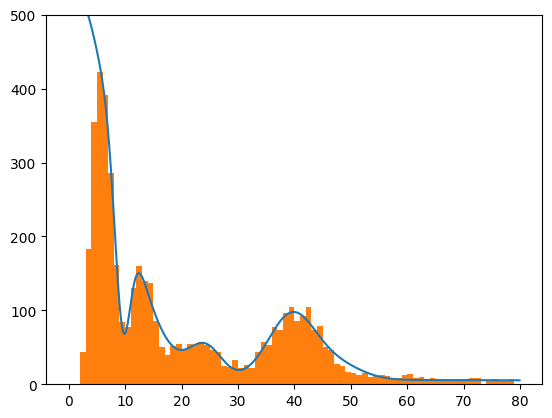

In [8014]:
x_lower = np.arange(0,80,0.1)
plt.plot(x_lower,gaus_poly(x_lower,*parameters_lower))
plt.hist(results.data()['energy'],bins=Nab.np.arange(0, 80))


plt.ylim(0,500)
# plt.yscale('log')
plt.show()

In [8015]:
print(chi2,chi2_lower)

0.636305647081688 27.097400627947195


In [8016]:
(parameters_lower[4]*27.3523/22.59)

47.96568696345027

In [8017]:
parameters_lower[3]

88.98142430565393

In [8008]:
(parameters_lower[3]*16.05/79.8)

17.743979391790102

In [7121]:
parameters[1],parameters[4]

(600.7204460402887, 641.653321997886)

In [6107]:
# x = [parameters_lower[4],(parameters_lower[4]*27.3523/22.59),parameters[1],parameters[4],(parameters[4]*390.872/387.461)]
# y = [22.59,27.352,363.758,387.461,390.872]
# a, b, c = np.polyfit(y, x, deg=2)

In [7430]:
# x_plot = np.arange(0,500)
# plt.scatter(y,x,marker = '.')
# plt.plot(x_plot,a*x_plot**2 + b*x_plot +c, linestyle = ':',color = 'black')

# plt.show()

In [7431]:
# a,b,c

In [7432]:
# parameters

In [7433]:
# parameters[2],parameters[5]

In [7434]:
# parameters_lower[2],parameters_lower[5]

In [7435]:
# sig = [parameters_lower[5],parameters[2],parameters[5]]
# en = [parameters_lower[1],parameters[1],parameters[4]]

In [7436]:
# a, b,c = np.polyfit(en,sig, deg=2)
# x = np.linspace(0,700)

In [7437]:
# plt.scatter(en,sig,marker = '.')
# plt.plot(x,a*x**2 + b*x +c, linestyle = ':',color = 'black')
# plt.show()

In [7438]:
# def gaussian(x,*pars):
#     return pars[0]*np.exp(-1.0 * ((x-ecap_high)/pars[2])**2.0)

# def double_gaus(x,*pars):
#     return pars[0]*np.exp(-1.0 * ((x-ecap_low1)/pars[2])**2.0) + (pars[0]*1.37/5.60)*np.exp(-1.0 * ((x-ecap_low2)/pars[2])**2.0)

# def gaus(x,*pars):
#     offset = pars[-1]
    
    
#     y = np.zeros(x.shape)
    
    
#     gaus_loc = np.logical_and(x>pars[1]-pars[2],x<pars[7]+pars[5])
#     y[x<pars[1]-pars[2]] = line1(x[x<pars[1]-pars[2]],*pars)
#     y[x>pars[7]+pars[5]] = line2(x[x>pars[7]+pars[5]],*pars)
#     y[gaus_loc] = (line2(x[gaus_loc],*pars)-line1(x[gaus_loc],*pars))/len(gaus_loc)
    
    
    
#     # gaus_loc = np.logical_and(x<pars[1]+pars[2],x>pars[1]-pars[2])
# #     gaus_loc = np.logical_and(x>cent_1-pars[2],x<cent_3+pars[5])
    
# #     y[x<cent_1-pars[2]] = line1(x[x<cent_1-pars[2]],*pars)
# #     y[x>cent_3+pars[5]] = line2(x[x>cent_3+pars[5]],*pars)
# #     # y[x<pars[1]-pars[2]] = line1(x,*pars)[x]
# #     y[gaus_loc] = (line2(x[gaus_loc],*pars)-line1(x[gaus_loc],*pars))/len(gaus_loc)
#     # y[gaus_loc] = ((line2(x[x>pars[1]+pars[2]],*pars)[0]-line1(x[x<pars[1]-pars[2]],*pars)[-1])/(2*pars[2]))*(x[gaus_loc]-pars[1])
#     # y[x>=pars[1]-pars[2]] = (line1(x,*pars)-line2(x,*pars))/(2*pars[2])
   
#     # y[x>pars[4]+pars[2]] = line2(x,*pars)
    
#     # gaus = gaussian(x,*pars[0:3]) + offset
#     # y[x>=pars[4]-pars[2]] = (line2(x[x>=pars[4]-pars[2]],*pars)-line3(x[x>=pars[4]-pars[2]],*pars))/(2*pars[2])
#     # y[x>pars[4]+pars[2]] = line3(x[x>pars[4]+pars[2]],*pars)
    
    
# #     gaus_loc_1 = np.logical_and(x<pars[1]+pars[2],x>pars[1]-pars[2])
# #     gaus_loc_2 = np.logical_and(x<pars[4]-pars[5],x>pars[1]+pars[2])
# #     gaus_loc_3 = np.logical_and(x<pars[7]+pars[5],x>pars[4]-pars[5])
    
# #     y[x<pars[1]-pars[2]] = line1(x[x<pars[1]-pars[2]],*pars)
# #     y[gaus_loc_2] = line2(x[gaus_loc_2],*pars)/len(gaus_loc_2)
# #     y[x>pars[7]+pars[5]] = line3(x[x>pars[7]+pars[5]],*pars)
# #     y[gaus_loc_1] = (line2(x[gaus_loc_1],*pars)-line1(x[gaus_loc_1],*pars))/len(gaus_loc_1)
    
# #     y[gaus_loc_3] = (line3(x[gaus_loc_3],*pars)-line2(x[gaus_loc_3],*pars))/len(gaus_loc_3)
    
#     gaus = double_gaus(x,*pars[3:8])+ gaussian (x,*pars[0:3]) +offset
    
    
#     return y + gaus

In [7439]:
# parameters, errors = curve_fit(gaus, bin_edges[:-1]+width/2, histogram,p0 = [50,598,10,10,645,7,3,640,1e-7,7,3,10])

In [7440]:
# x = np.arange(500, 800,0.1)
# plt.plot(x,gaus(x,*parameters))
# plt.hist(results.data()['energy'],bins=Nab.np.arange(500, 800))
# # y = parameters[3]*(x[x<parameters[1]-parameters[2]]-parameters[1])+parameters[4]
# # y2 = parameters[5]*(x[x>parameters[1]+parameters[2]]-parameters[1])+parameters[6]
# # y3 = parameters[0]*np.exp(-1* ((x-parameters[1])/parameters[2])**2) + parameters[-1]
# # plt.plot(x[x<parameters[1]-parameters[2]],y)
# # plt.plot(x[x>parameters[1]+parameters[2]],y2)
# # plt.plot(x,y3)
# # plt.ylim(0,10)
# # plt.yscale('log')
# plt.show()

In [7441]:
# parameters

In [7442]:
# def poly(x,*pars):
#     return (pars[0] + pars[1]*x +pars[2]*x**2)
# def gaussian(x,*pars):
#     return pars[0]*np.exp(-1.0 * ((x-pars[1])/pars[2])**2.0)
# def threshold(x,*pars):
#     return pars[0]*np.exp(-1.0 * ((x)/pars[2])**2.0)
# def double_gaus(x,*pars):
#     return pars[0]*np.exp(-1.0 * ((x-xray_high)/pars[2])**2.0) + pars[3]*np.exp(-1.0 * ((x-xray_low)/pars[2])**2.0)
# def multi_gaus(x, *pars):
#     num_gaus = int((len(pars))/3)
#     # print(pars)
#     if num_gaus==3:
#         g = threshold(x,*pars[0:3]) + double_gaus(x,*pars[3:8])
#     if num_gaus==4:
#         g = threshold(x,*pars[0:3]) + double_gaus(x,*pars[3:8]) + gaussian(x,*pars[8:11])
#     if num_gaus==5:
#         g = threshold(x,*pars[0:3]) + double_gaus(x,*pars[3:8]) + gaussian(x,*pars[8:11]) + gaussian(x,*pars[11:14])
    
#     offset = pars[-1]
#     return g + offset
# def gaus_poly(x,*pars):
#     list_pars = pars[0]
#     return multi_gaus(x,*pars[0:-3])+poly(x,*pars[-3:])

In [7443]:
# parameters_lower, errors_lower = curve_fit(gaus_poly, bin_edges_lower[:-1]+width_lower/2, histogram_lower,
#                                            p0 = [100000,0,thresh_start+4,xray_peak,xray_cent+2,4,xray_peak,xray_cent-2,600,thresh_start+4,4,100,22,5,40,5,3,3])
                                               
#                                            #p0 = [100000,0,thresh_start+3,xray_peak,xray_cent+2,7,xray_peak,xray_cent-2,1000,thresh_start+4,2,300,20,10,20,50,30,30])

In [7718]:
parameters_lower[1],parameters_lower[4],parameters_lower[7],parameters_lower[9],parameters_lower[12]

(0.0,
 39.6143969064518,
 24.171224900819833,
 -199.56308906285693,
 -3986499.08762551)

In [7719]:
parameters_lower

array([ 5.40580345e+02,  0.00000000e+00,  1.13761564e+01,  8.89814243e+01,
        3.96143969e+01,  5.97556824e+00,  4.31142599e+01,  2.41712249e+01,
        4.11498379e+00, -1.99563089e+02,  9.51534676e+00, -1.91933712e+00,
       -3.98649909e+06,  3.98650567e+06, -6.13913008e-03, -1.16903582e-04])

In [7444]:
# x_lower = np.arange(1,100,0.1)
# plt.plot(x_lower,gaus_poly(x_lower,*parameters_lower))
# plt.hist(results.data()['energy'],bins=Nab.np.arange(0, 100))


# # plt.ylim(0,1000)
# # plt.yscale('log')
# plt.show()

In [7155]:
# path = '/Users/arleeshelby/output.txt'

In [7156]:
# f = open(path)

In [7157]:
# lines = f.readlines()

In [7158]:
# a = []
# for line in lines:
#     a.append(line.replace('\t',',').splitlines()[0].split(','))

In [7384]:
# lines

In [6797]:
# df = {}
# # df['Run'] = {}
# num = []
# for i in range(3):
#     num.append(i)
    
# df['Run'] = num
# df['ecap'] = b
# a = pd.DataFrame(df)

In [6798]:
# a.to_csv('test.csv',mode = 'w',header = True,index = False)

In [7534]:
with open('/Users/arleeshelby/output.csv') as f:
    csv.DictReader(f)
    g = pd.read_csv(f)

In [7732]:
g['xray'][18] = parameters_lower.tolist()

In [7733]:
g['xray'][18]

[540.5803446310185,
 0.0,
 11.376156367567251,
 88.98142430565393,
 39.6143969064518,
 5.975568237616336,
 43.11425985432901,
 24.171224900819833,
 4.114983786718576,
 -199.56308906285693,
 9.515346756080714,
 -1.9193371210358774,
 -3986499.08762551,
 3986505.6737302365,
 -0.006139130077508642,
 -0.00011690358201818842]

In [7734]:
np.float_(g['ecap'][0].replace('[','').replace(']','').split(','))[0]

58.83103205233663

In [7735]:
# g['xray']

In [7736]:
names = []
for i in range(11):
    names.append('p%d'%i)
names_x = []
for i in range(17):
    names_x.append('p%d'%i)

In [7737]:
df1 = {}
for i in range(10):
    df1[names[i]] = {}
    for j in range(len(g)):
        pars = np.float_(g['ecap'][j].replace('[','').replace(']','').split(','))[i]
        df1[names[i]][j] = pars

In [7741]:
g['xray'][18].

[540.5803446310185,
 0.0,
 11.376156367567251,
 88.98142430565393,
 39.6143969064518,
 5.975568237616336,
 43.11425985432901,
 24.171224900819833,
 4.114983786718576,
 -199.56308906285693,
 9.515346756080714,
 -1.9193371210358774,
 -3986499.08762551,
 3986505.6737302365,
 -0.006139130077508642,
 -0.00011690358201818842]

In [7742]:
df2 = {}
for i in range(16):
    df2[names_x[i]] = {}
    for j in range(len(g)):
        if j==18:
            # print(j)
            pars = np.float_(g['xray'][j])[i]
            df2[names_x[i]][j] = pars
        else:
            pars = np.float_(g['xray'][j].replace('[','').replace(']','').split(','))[i]
            df2[names_x[i]][j] = pars
            
    # j!=7 or j!=8 or j!=11:

In [7743]:
df_ecap = pd.DataFrame(df1)
df_xray = pd.DataFrame(df2)

In [7948]:
g

,pixel,run,ecap,chi2_e,xray,chi2_x
0,76,1374,"[58.83103205233663, 595.8118874579608, 7.15166...",1.983753,"[8066.517014801231, 0.0, 6.817878533074638, 22...",557.846713
1,77,1374,"[59.40394427502488, 600.4333725997816, 7.22731...",1.542704,"[4607.681009680175, 0.0, 9.375653345250164, 20...",74.950968
2,78,1374,"[45.69072708600087, 599.1125609379189, 7.44255...",1.618157,"[1383.3017145192357, 0.0, 8.311254825592828, 1...",74.950968
3,87,1374,"[49.94540437317657, 597.7945627367636, 7.26826...",1.597557,"[10446.162877396153, 0.0, 6.253642613222071, 1...",622.251965
4,88,1374,"[52.25996984152595, 600.7204460402887, 7.39549...",1.447793,"[218456.23670864417, 0.0, 4.1062198980076925, ...",97.059473
5,96,1374,"[38.07470243879024, 601.1389007318572, 6.53974...",1.327723,"[2209.6710036235786, 0.0, 8.46497680369915, 14...",47.708699
6,97,1374,"[46.36959547004999, 592.3045701268863, 6.07137...",1.000260,"[6254.9852009586975, 0.0, 8.587833084213036, 1...",118.793328
7,98,1374,"[43.52248883031499, 603.5660862094919, 7.08401...",1.340140,"[4748.677903360749, 0.0, 9.23438258476264, 258...",118.793328
8,101,1374,"[28.220917918012972, 600.0939514411654, 8.2989...",0.807690,"[1086.5893836652488, 0.0, 23.668775058047757, ...",118.793328
9,103,1374,"[16.060724553976357, 596.6164034336059, 8.6953...",0.535598,"[3111.6658229321934, 0.0, 12.020060452550942, ...",28.469452


In [7945]:
df_ecap

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,58.831032,595.811887,7.151669,10.961424,634.602138,7.450280,0.002255,1.470196e-04,-0.421930,0.716445
1,59.403944,600.433373,7.227314,11.682040,640.384593,6.922460,0.001669,1.082994e-04,-0.399709,0.666384
2,45.690727,599.112561,7.442558,11.997226,640.270814,5.870017,0.002014,1.946804e-04,-0.218129,0.539470
3,49.945404,597.794563,7.268268,11.800341,636.054754,5.992646,0.001358,1.817032e-04,-0.680246,1.033985
4,52.259970,600.720446,7.395494,11.399284,641.653322,6.197920,0.001894,2.134321e-04,-0.261016,0.659408
5,38.074702,601.138901,6.539747,8.470551,640.122737,5.290506,0.001126,1.569277e-04,-0.662188,0.962824
6,46.369595,592.304570,6.071378,8.880688,632.998870,6.280186,0.001641,1.501318e-04,-0.380912,0.701693
7,43.522489,603.566086,7.084013,9.865062,644.383045,5.582560,0.001244,4.562581e-05,-0.867232,1.074992
8,28.220918,600.093951,8.298913,5.807351,640.076188,6.482883,0.000897,1.222548e-04,-0.453573,0.682744
9,16.060725,596.616403,8.695303,4.195362,636.361626,6.148519,0.000684,1.637736e-04,-0.317805,0.594701


In [7746]:
df_xray

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
0,8066.517015,0.0,6.817879,221.240076,38.661855,6.551940,97.231621,18.742366,7.112393,591.309724,13.248310,2.370349,4.007375e+06,-4.007371e+06,0.059293,-0.000362
1,4607.681010,0.0,9.375653,201.301870,38.599797,6.221376,-662.074440,10.034450,2.047245,131.519542,22.379151,5.448249,-4.174105e+06,4.174124e+06,-0.153682,0.000342
2,1383.301715,0.0,8.311255,162.887699,39.688454,6.697159,421.671542,13.438074,2.278754,195.225712,21.330997,5.649309,-4.004643e+06,4.004658e+06,-0.106929,0.000196
3,10446.162877,0.0,6.253643,161.155369,39.604454,5.355406,1075.995995,12.948123,2.585378,-1170.929100,12.869670,0.063762,4.006012e+06,-4.005941e+06,-1.055401,0.003857
4,218456.236709,0.0,4.106220,189.423555,39.710042,6.030561,-120847.356183,1.904650,3.136547,648.252931,2.333418,15.566476,3.986794e+06,-3.986792e+06,0.089456,-0.000504
5,2209.671004,0.0,8.464977,147.371267,39.989977,5.252169,-452.955178,7.974559,0.429986,-458.813868,9.575484,2.317155,-3.986469e+06,3.986496e+06,-0.356655,0.001224
6,6254.985201,0.0,8.587833,152.203186,39.262196,5.458340,-31667.714939,10.761749,2.838052,30592.963951,10.803438,2.795103,3.986620e+06,-3.986591e+06,-0.359720,0.001213
7,4748.677903,0.0,9.234383,258.789507,39.156017,6.214736,-933.205900,9.805748,1.928269,55.695141,24.984512,4.808219,3.986561e+06,-3.986577e+06,0.402336,-0.001683
8,1086.589384,0.0,23.668775,118.775430,40.898970,4.999951,-397.332319,18.119297,3.291047,-252.870711,25.070408,-6.816345,-1.288651e+07,1.288652e+07,-0.044488,-0.000039
9,3111.665823,0.0,12.020060,99.003955,39.645151,8.036760,-6434.901746,19.218760,2.301729,6238.739997,19.246096,2.264706,-4.144934e+06,4.144962e+06,-0.298367,0.000869


In [7955]:
(np.sqrt(df_ecap['p2']**2+df_ecap['p5']**2+df_xray['p5']**2)-intercept)/slope

0      6.407664
1      6.338374
2      5.545996
3      4.987642
4      5.431014
5      4.305982
6      4.807609
7      5.599198
8      4.791082
9      6.514900
10     4.337209
11     5.624028
12     4.510344
13     5.344694
14    11.673513
15     5.273692
16     5.308173
17     4.322895
18     5.655115
dtype: float64

In [7792]:
eV = [22.59,363.758,387.461]

In [7793]:
adc = [df_xray['p4'][0],df_ecap['p1'][0],df_ecap['p4'][0]]

In [7795]:
# x = [parameters_lower[4],(parameters_lower[4]*27.3523/22.59),parameters[1],parameters[4],(parameters[4]*390.872/387.461)]
# y = [22.59,27.352,363.758,387.461,390.872]
a, b = np.polyfit(eV, adc, deg=1)

In [7802]:
x = np.arange(0,600)

In [7803]:
fit = a*x+b

In [7810]:
def cal_fit(x,a,b):
    return a*x+b

In [ ]:
adc = [df_xray['p4'][0],df_ecap['p1'][0],df_ecap['p4'][0]]

In [7811]:
fit_pars = []
for i in range(len(g)):
    adc = [df_xray['p4'][i],df_ecap['p1'][i],df_ecap['p4'][i]]
    a, b = np.polyfit(eV, adc, deg=1)
    fit_pars.append([a,b])

In [7827]:
fit_pars[]

[[1.6331934046677412, 1.7653748829264568],
 [1.6482196451421345, 1.3368556664651747],
 [1.6432927576151777, 2.4923677195306615],
 [1.6353061274603895, 2.679724015099539],
 [1.6474209461047407, 2.4315517599883756],
 [1.6447836941281206, 2.8343962579415245],
 [1.6245552424731364, 2.4900563278893264],
 [1.6568386373572273, 1.6761663522529116],
 [1.640818666848039, 3.7962856059408585],
 [1.6341724668909123, 2.695272499725928],
 [1.6447099887855212, 2.685120232844903],
 [1.627976206964344, 2.6641080466380336],
 [1.643922867022449, 2.565679740432332],
 [1.633560747209602, 2.7453897693011178],
 [1.6308696246327905, -2.1442969227680795],
 [1.6349803429333791, 1.36820353020375],
 [1.6214249265328087, 4.229433576206439],
 [1.6321958915391581, 4.05448352429826],
 [1.6457398891344042, 2.4300449802630766]]

In [7954]:
slope = np.array(fit_pars)[:,0]
intercept = np.array(fit_pars)[:,1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 1., 2., 2., 1., 0., 0., 0., 0., 1., 0., 0., 2.,
        2., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1.61 , 1.611, 1.612, 1.613, 1.614, 1.615, 1.616, 1.617, 1.618,
        1.619, 1.62 , 1.621, 1.622, 1.623, 1.624, 1.625, 1.626, 1.627,
        1.628, 1.629, 1.63 , 1.631, 1.632, 1.633, 1.634, 1.635, 1.636,
        1.637, 1.638, 1.639, 1.64 , 1.641, 1.642, 1.643, 1.644, 1.645,
        1.646, 1.647, 1.648, 1.649, 1.65 , 1.651, 1.652, 1.653, 1.654,
        1.655, 1.656, 1.657, 1.658, 1.659, 1.66 , 1.661, 1.662, 1.663,
        1.664, 1.665, 1.666, 1.667, 1.668, 1.669]),
 <BarContainer object of 59 artists>)

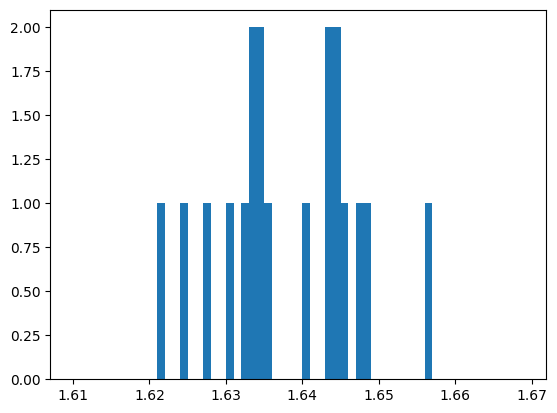

In [7868]:
plt.hist(slope,bins = np.arange(1.61,1.67,0.001))

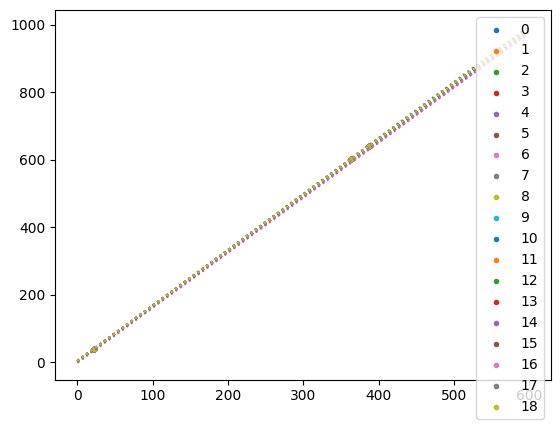

In [7957]:
for i in range(len(g)):
    plt.scatter(eV,adc,marker = '.',label = '%d'%i)
    plt.plot(x,cal_fit(x,fit_pars[i][0],fit_pars[i][1]),linestyle = ':')
plt.legend()
# plt.xlim(0,100)
plt.show()

In [7828]:
# df_xray['p4'],df_xray['p4']*(27.3523/22.59)

In [7829]:
# df_ecap['p1'],df_ecap['p4'],df_ecap['p4']*(390.872/387.461)

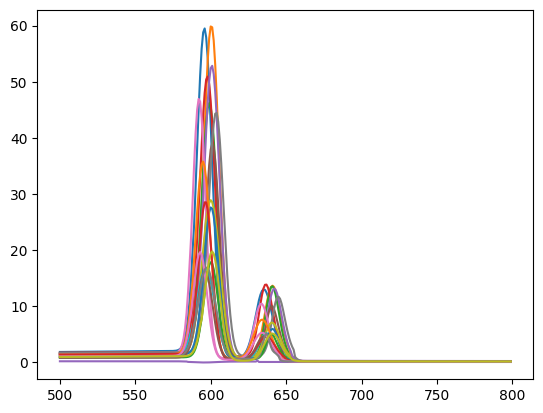

In [7586]:
x = np.arange(500,800)
for i in range(len(g)):
    plt.plot(x,gaus(x,*np.float_(g['ecap'][i].replace('[','').replace(']','').split(','))),label = '%d'%i)
# plt.legend()

x = np.arange(0,100)
for i in range(len(g)):
    # if i !=2 and i!=7 and i!=8 and i!=11:
    if i==18:
        plt.plot(x,gaus_poly(x,*np.float_(g['xray'][i])),label = '%d'%i)
    else:
        plt.plot(x,gaus_poly(x,*np.float_(g['xray'][i].replace('[','').replace(']','').split(','))),label = '%d'%i)
plt.legend()   
plt.ylim(0,1000)
plt.show()

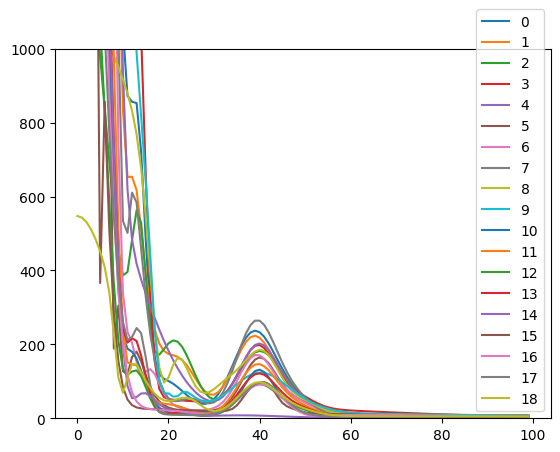

In [7783]:
x = np.arange(0,100)
for i in range(len(g)):
    # if i !=2 and i!=7 and i!=8 and i!=11:
    if i==18:
        plt.plot(x,gaus_poly(x,*np.float_(g['xray'][i])),label = '%d'%i)
    else:
        plt.plot(x,gaus_poly(x,*np.float_(g['xray'][i].replace('[','').replace(']','').split(','))),label = '%d'%i)
plt.legend()   
plt.ylim(0,1000)
plt.show()

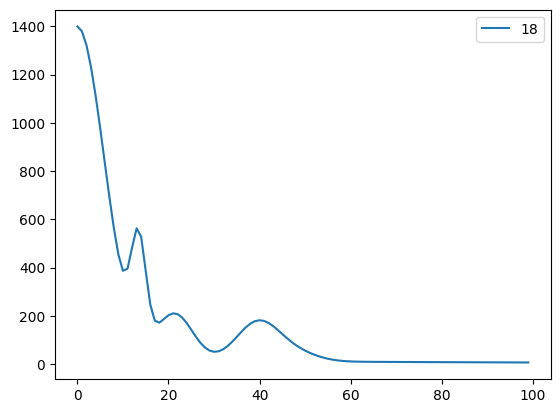

In [7784]:
plt.plot(x,gaus_poly(x,*np.float_(g['xray'][2].replace('[','').replace(']','').split(','))),label = '%d'%i)
plt.legend()   
plt.show()

In [6802]:
l = [76,  77,  78,  87,  88,  96,  97,  98, 101, 103, 105, 107, 109, 113, 115, 116, 118, 121, 122, 123, 124]

In [6825]:
file = open('/Users/arleeshelby/manitoba_pixel_list.txt','r')
a = file.read()

In [6823]:
np.int_(a.split(',')).tolist()

In [6796]:
b = []
b.append(parameters.tolist())
b.append(parameters_lower.tolist())
b.append(0)

In [6681]:
with open('eggs.csv','w') as f:
    fieldnames = ['Run','ecap']
    writer = csv.DictWriter(f,fieldnames = fieldnames)
    writer.writeheader()
    df = {}
    df['Run'] = {}
    
    writer.writerow({'Run':1374,'ecap':parameters.tolist()})
    writer.writerow({'Run':1374,'ecap':parameters_lower.tolist()})
    f.close()

In [6833]:
par_76 = [float(i) for i in a[2]]
par_76_low = [float(i) for i in a[3]]

In [6834]:
par_76,par_76_low

([58.831, 595.812, 7.152, 10.961, 634.602, 7.45, 0.002, 0.0, -0.422, 0.716],
 [8066.517,
  0.0,
  6.818,
  221.24,
  38.662,
  6.552,
  97.232,
  18.742,
  7.112,
  591.31,
  13.248,
  2.37,
  4007374.669,
  -4007370.776,
  0.059,
  -0.0])

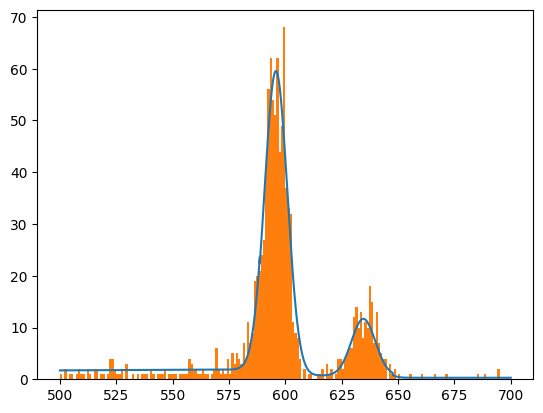

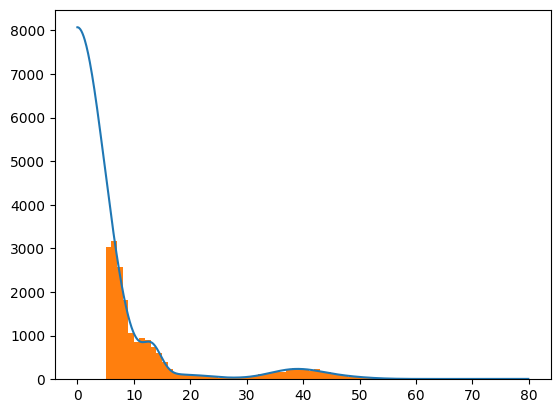

In [6315]:
x = np.arange(500, 700,0.01)
plt.plot(x,gaus(x,*par_76))
plt.hist(results.data()['energy'],bins=Nab.np.arange(500, 700))

# y = parameters[3]*(x[x<parameters[1]-parameters[2]]-parameters[1])+parameters[4]
# y2 = parameters[5]*(x[x>parameters[1]+parameters[2]]-parameters[1])+parameters[6]
# y3 = parameters[0]*np.exp(-1* ((x-parameters[1])/parameters[2])**2) + parameters[-1]
# plt.plot(x[x<parameters[1]-parameters[2]],y)
# plt.plot(x[x>parameters[1]+parameters[2]],y2)
# plt.plot(x,y3)
# plt.ylim(0,10)
# plt.yscale('log')
plt.show()

x_lower = np.arange(0,80,0.1)
plt.plot(x_lower,gaus_poly(x_lower,*par_76_low))
plt.hist(results.data()['energy'],bins=Nab.np.arange(5, 80))


# plt.ylim(0,1000)
# plt.yscale('log')
plt.show()

In [6835]:
mask = []
index = []
for i in range(len(a)):
    # print(np.where(a[i][0] == '1374')[0])
    if np.where(a[i][0] == '1374')[0]==0:
        mask.append(True)
        index.append(i)
    else:
        mask.append(False)
        index.append(i)

In [6836]:
np.array(a,dtype=object)[mask]

array([list(['1374', '76']), list(['1374', '77']), list(['1374', '78']),
       list(['1374', '87']), list(['1374', '88']), list(['1374', '96']),
       list(['1374', '97']), list(['1374', '98']), list(['1374', '101']),
       list(['1374', '103']), list(['1374', '105']),
       list(['1374', '107']), list(['1374', '109']),
       list(['1374', '113']), list(['1374', '115']),
       list(['1374', '116']), list(['1374', '118']),
       list(['1374', '121']), list(['1374', '122']),
       list(['1374', '123']), list(['1374', '124'])], dtype=object)

In [7871]:
with open('/Users/arleeshelby/manitobametadata_filters.csv') as file:
    reader = csv.reader(file)
    v = pd.DataFrame([reader])

In [7886]:
df = pd.read_table('/Users/arleeshelby/manitobametadata_filters.csv',delimiter = '|')

In [7936]:
df.columns[14]

'Date Time [UTC]'

In [7933]:
np.array(df['Main Directory'][df['RunID']==1374])[0]

'01-26-2022 Sn113 Partial Bias Scan + 3hr -300V Bias Run'

In [ ]:
np.array(df['timestamp'][df['RunID']==1374])[0]

In [7944]:
dirt = []
for i in range(10,15):
    dirt.append(np.array(df[df.columns[i]][df['RunID']==1374])[0])
    print(df.columns[i])

Proton
Proton Energy
Cd109
Sn113
Date Time [UTC]


In [7939]:
dirt

[False, 0, False, True, '2022-01-27 00:08']

In [7940]:
df.columns[i]

'Date Time [UTC]'